In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import time


In [2]:
#create the set of random longitudes and latitudes using the np method with the ranom uniform function practice in random_numbers.ipynb
lats = np.random.uniform(-90.000, 90.000, size= 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)

#pack the lats and longs together by zipping them with the zip() function
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list (they have been stored as a zip object)
#you can only unzip a zipped tuple once before it's removed from memory
#so make sure you unzip it into a list right away

coordinates = list(lat_lngs)

In [4]:
#We need to use the citypy module to access the closest cities to given coordinate
#Went to anaconda prompt(python data) installed citpy with "pip install citipy"
#https://github.com/wingchen/citipy for inf0
from citipy import citipy


In [5]:
#create a list for holding cities

cities = []

#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm a sufficent list
len(cities)

639

In [6]:
import requests

In [7]:

#import the API key
from config import weather_api_key


In [8]:
#Starting URL for Weather API Call from https://openweathermap.org/current#name
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
#create an endpoint URL for a city to specify
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather
#create output for request errors in case the url doesnt work and doesnt produce a status of 200
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [11]:
#get the text of the 'get'request
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":63.88,"feels_like":62.89,"temp_min":57.2,"temp_max":70,"pressure":1020,"humidity":62},"visibility":10000,"wind":{"speed":19.57,"deg":110},"clouds":{"all":20},"dt":1618000701,"sys":{"type":1,"id":3486,"country":"US","sunrise":1617963151,"sunset":1618010311},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [12]:
#get the JSON text of the 'get' request, much easier to read and save to a variable
boston_data = city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 63.88,
  'feels_like': 62.89,
  'temp_min': 57.2,
  'temp_max': 70,
  'pressure': 1020,
  'humidity': 62},
 'visibility': 10000,
 'wind': {'speed': 19.57, 'deg': 110},
 'clouds': {'all': 20},
 'dt': 1618000701,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1617963151,
  'sunset': 1618010311},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
#use the 'sys' key from the json text, we see above that the country ID is
#in this key and we can pull that by using the "country" key after
boston_data["sys"]["country"]

'US'

In [14]:
#get all interesting data and save it to variables
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 70 62 20 19.57


In [15]:
#pull the date timestamp from the data
boston_data["dt"]

1618000701

In [16]:
#convert that timestamp into ISO, a standardzed date format
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 4, 9, 20, 38, 21)

In [17]:
#convert the previously acquired ISO date into a readable format using
#the method strftime() that lets you add how you want the string to look
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-04-09 20:38:21'

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters that start at 1 not 0.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
#create a loop through our generated city list to build a url for each city

#for i in range(len(cities)):

#use enumerate() to retrieve both the citie index and city name in the same for loop


API_REQ_MAX_PER_SEC = 60 #API request limit per second

for i, city in enumerate(cities):
    #don't exceed API rate limit
    if i % (API_REQ_MAX_PER_SEC - 1) == 0 and i != 0:
        print("Waiting for next request window...")
        time.sleep(60)

    #group the cities in dets of 50 for logging purposes
    if (i % 50 == 0 and i > 50):
        set_count +=1
        record_count = 1
    #creat and endpoint url with each city
    city_url = url + "&q=" + cities[i]  
    
    #log the url, record and set numbers and the city name
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #add 1 to the record count
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Cloudiness": city_clouds,
                          "Country": city_country, 
                          "Date": city_date,  
                          "Humidity": city_humidity,                          
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | palana
Processing Record 2 of Set 1 | berbera
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | clinton
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | nelson bay
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | luderitz
Processing Record 12 of Set 1 | pointe michel
Processing Record 13 of Set 1 | pimentel
Processing Record 14 of Set 1 | oudtshoorn
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | bereda
Processing Record 18 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | provideniya
Processing Record 22 of Set 1 | mar del plata
Pro

Processing Record 37 of Set 3 | wagga wagga
Processing Record 38 of Set 3 | nizhneyansk
City not found. Skipping...
Processing Record 39 of Set 3 | nanortalik
Processing Record 40 of Set 3 | wanxian
Processing Record 41 of Set 3 | tiksi
Processing Record 42 of Set 3 | bandarbeyla
Processing Record 43 of Set 3 | dingle
Processing Record 44 of Set 3 | saint-pierre
Processing Record 45 of Set 3 | upernavik
Processing Record 46 of Set 3 | shelburne
Processing Record 47 of Set 3 | ilulissat
Processing Record 48 of Set 3 | iquique
Processing Record 49 of Set 3 | novo aripuana
Processing Record 50 of Set 3 | luau
Processing Record 1 of Set 4 | mwense
Processing Record 2 of Set 4 | werdau
Processing Record 3 of Set 4 | primorsk
Processing Record 4 of Set 4 | neath
Processing Record 5 of Set 4 | bluff
Processing Record 6 of Set 4 | alofi
Processing Record 7 of Set 4 | cody
Processing Record 8 of Set 4 | vestmannaeyjar
Processing Record 9 of Set 4 | fairbanks
Processing Record 10 of Set 4 | gron

Processing Record 28 of Set 7 | batagay-alyta
Processing Record 29 of Set 7 | mandalgovi
Processing Record 30 of Set 7 | mlonggo
Processing Record 31 of Set 7 | labuhan
Processing Record 32 of Set 7 | nuqui
Processing Record 33 of Set 7 | alice springs
Processing Record 34 of Set 7 | terrace bay
Processing Record 35 of Set 7 | san andres
Processing Record 36 of Set 7 | atar
Processing Record 37 of Set 7 | hami
Processing Record 38 of Set 7 | ugoofaaru
Processing Record 39 of Set 7 | poya
Processing Record 40 of Set 7 | murgab
Processing Record 41 of Set 7 | richards bay
Processing Record 42 of Set 7 | kapan
Processing Record 43 of Set 7 | taoudenni
Processing Record 44 of Set 7 | rafraf
Processing Record 45 of Set 7 | natal
Processing Record 46 of Set 7 | mariental
Processing Record 47 of Set 7 | surgut
Processing Record 48 of Set 7 | savannah bight
Processing Record 49 of Set 7 | poum
Processing Record 50 of Set 7 | kemijarvi
Processing Record 1 of Set 8 | eregli
Processing Record 2 o

Processing Record 18 of Set 11 | huangzhai
Processing Record 19 of Set 11 | nichinan
Processing Record 20 of Set 11 | te anau
Processing Record 21 of Set 11 | antsirabe
Processing Record 22 of Set 11 | la ronge
Processing Record 23 of Set 11 | iskateley
Processing Record 24 of Set 11 | karauzyak
City not found. Skipping...
Processing Record 25 of Set 11 | porosozero
Processing Record 26 of Set 11 | santa rosa
Processing Record 27 of Set 11 | grindavik
Processing Record 28 of Set 11 | pec
Processing Record 29 of Set 11 | okahandja
Processing Record 30 of Set 11 | bowen
Processing Record 31 of Set 11 | zhitikara
City not found. Skipping...
Processing Record 32 of Set 11 | tabou
Processing Record 33 of Set 11 | rexburg
Processing Record 34 of Set 11 | athens
Processing Record 35 of Set 11 | casablanca
Processing Record 36 of Set 11 | peterhead
Processing Record 37 of Set 11 | mahadday weyne
City not found. Skipping...
Processing Record 38 of Set 11 | bulgan
Processing Record 39 of Set 11 

In [20]:
len(city_data)

585

In [21]:
#convert this array of dictionaries with city data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Palana,100,RU,2021-04-09 20:46:15,90,59.1167,159.9667,12.07,18.50
1,Berbera,0,SO,2021-04-09 20:46:16,65,10.4396,45.0143,79.83,3.67
2,Lompoc,4,US,2021-04-09 20:46:16,55,34.6391,-120.4579,63.00,16.11
3,East London,33,ZA,2021-04-09 20:46:16,84,-33.0153,27.9116,66.00,3.87
4,Clinton,75,US,2021-04-09 20:46:16,52,42.5870,-82.9199,73.99,18.41
5,Nelson Bay,90,AU,2021-04-09 20:46:17,100,-32.7167,152.1500,64.99,4.61
6,Carnarvon,40,AU,2021-04-09 20:46:17,78,-24.8667,113.6333,77.00,8.05
7,Mataura,100,NZ,2021-04-09 20:46:17,91,-46.1927,168.8643,46.99,1.70
8,Luderitz,0,NA,2021-04-09 20:46:18,51,-26.6481,15.1594,74.46,8.70
9,Pointe Michel,75,DM,2021-04-09 20:46:18,78,15.2500,-61.3833,80.60,2.30


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [23]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Palana,RU,2021-04-09 20:46:15,59.1167,159.9667,12.07,90,100,18.50
1,Berbera,SO,2021-04-09 20:46:16,10.4396,45.0143,79.83,65,0,3.67
2,Lompoc,US,2021-04-09 20:46:16,34.6391,-120.4579,63.00,55,4,16.11
3,East London,ZA,2021-04-09 20:46:16,-33.0153,27.9116,66.00,84,33,3.87
4,Clinton,US,2021-04-09 20:46:16,42.5870,-82.9199,73.99,52,75,18.41
5,Nelson Bay,AU,2021-04-09 20:46:17,-32.7167,152.1500,64.99,100,90,4.61
6,Carnarvon,AU,2021-04-09 20:46:17,-24.8667,113.6333,77.00,78,40,8.05
7,Mataura,NZ,2021-04-09 20:46:17,-46.1927,168.8643,46.99,91,100,1.70
8,Luderitz,NA,2021-04-09 20:46:18,-26.6481,15.1594,74.46,51,0,8.70
9,Pointe Michel,DM,2021-04-09 20:46:18,15.2500,-61.3833,80.60,78,75,2.30


In [24]:
#create output file (CSV) to store data
output_data_file = "weather_data/cities.csv"

#Export the city_data into the csv with the index label (or column A) 
#header as "City_ID." If we ever need to export the CSV file to a 
#DataFrame, that header will be present in the DataFrame

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [25]:
## Plot Latitude vs Temperature

In [26]:
#extract all relevent fields from the datafram for plotting this relationship
#We'll obviously need the latitude and max temp but also grab humidity, cloudiness and wind speed
#save them to usable variables
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [27]:
#the scatterplot will also need the current date in it so we need to
#import the time module 
import time
#get today's date in seconds
today = time.time()
today

1618001930.0302968

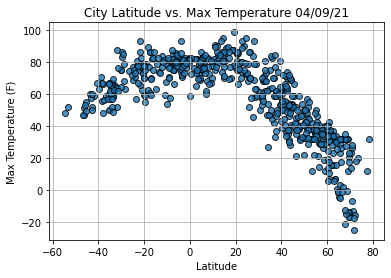

In [28]:
#Build the scatter plot for latitude vs. max temp

plt.scatter(lats, 
            max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig1.png")
#show plot
plt.show()

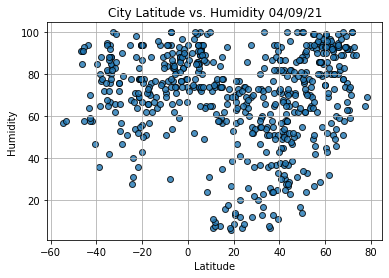

In [29]:
#Build the scatter plot for latitude vs. max temp

plt.scatter(lats, 
            humidity,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig2.png")
#show plot
plt.show()

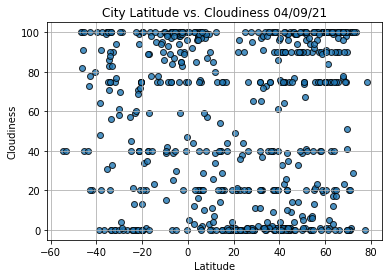

In [30]:
#Build the scatter plot for latitude vs. max temp

plt.scatter(lats, 
            cloudiness,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig3.png")
#show plot
plt.show()

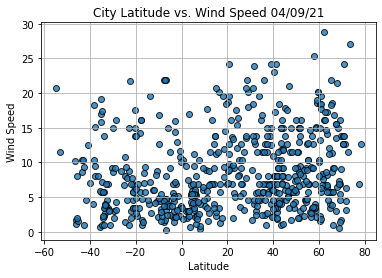

In [31]:
#Build the scatter plot for latitude vs. max temp

plt.scatter(lats, 
            wind_speed,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig4.png")
#show plot
plt.show()